In [3]:
import numpy as np
from scipy.stats import norm, uniform, cauchy, chi2, expon
from matplotlib import pyplot as plt


def gamma_coupling(dp, dq, rp, rq) -> np.array:
    """
    Function that samples from the gamma-coupling (so called by Jensen)

    Params: 
            dp (callable): evaluate the density of the proposal distribution p
            dq (callable): evaluate the density of the proposal distribution q
            rp: draw a random sample from proposal distribution p
            rq: draw a random sample from proposal distribution q
    """

    X = rp()
    W = np.random.uniform()

    if W <= dq(X)/dp(X):
        Y = X
    else: 
        reject = True
        while reject:
            # Loop executed at least once, when W larger than the acceptance_ratio, 
            Y = rq()
            W = np.random.uniform()

            reject = (W <= dp(Y)/dq(Y))

    return (X,Y)


def reflection_maximal_coupling(mu1, mu2, var):
    """
    Maximal coupling of two marginal univariate normals with different mean and common variance
    Page 30 of Solving the Poisson Equation using Coupled Markov chains

    Params: 
            mu1: mean of the first univariate gaussian
            mu2: mean of the second univariate gaussian
            var: variance
    """

    z = (mu1-mu2)/np.sqrt(var)
    Xdot = np.random.normal(loc=0,scale=1)
    W = np.random.uniform()
    X = mu1 + np.sqrt(var) * Xdot

    acceptance_probability = norm.pdf(z+Xdot)/norm.pdf(Xdot)

    if W < acceptance_probability:
        Y = X
    else:
        Y = mu2 - np.sqrt(var) * Xdot
    
    return (X,Y)


Text(0.5, 1.0, 'Gamma Coupling of Uniform(2,2) and Normal(0,1)')

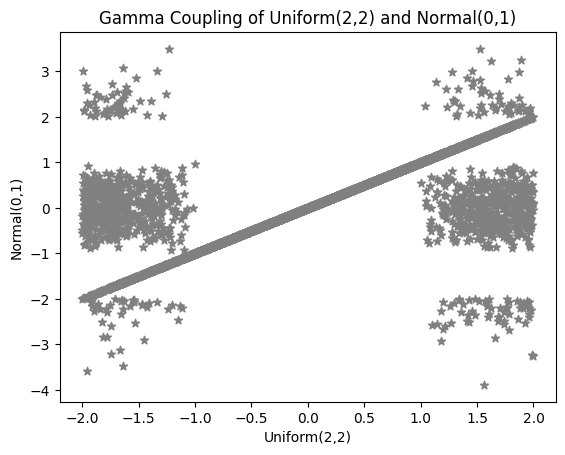

In [3]:
def dp(X):
    return uniform.pdf(X, loc = -2, scale = 4)

def dq(X):
    return norm.pdf(X)

def rp():
    return uniform.rvs(loc=-2, scale=4, size=1)

def rq():
    return norm.rvs(size=1)



xs, ys = [], []
for i in range(5000):
    (X,Y) = gamma_coupling(dp,dq,rp,rq)
    xs.append(X)
    ys.append(Y)


fig, ax = plt.subplots()
ax.scatter(xs,ys, color = "grey", marker = "*")
ax.set_xlabel('Uniform(2,2)')
ax.set_ylabel('Normal(0,1)')
ax.set_title('Gamma Coupling of Uniform(2,2) and Normal(0,1)')



Text(0.5, 1.0, 'Gamma Coupling of Normal(1,1) and Normal(0,1)')

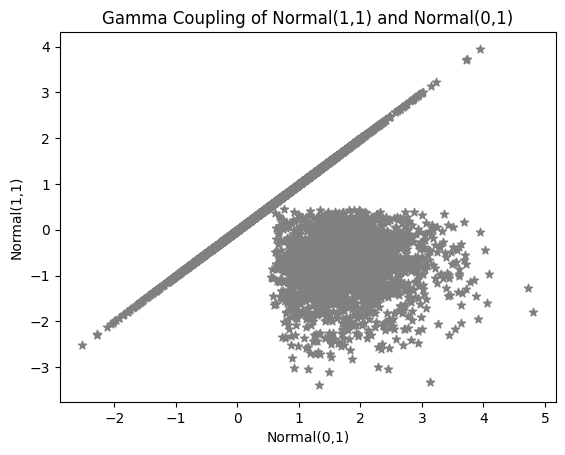

In [5]:
def dp(X):
    return norm.pdf(X, loc = 1, scale = 1)

def dq(X):
    return norm.pdf(X)

def rp():
    return norm.rvs(loc=1, scale=1, size=1)

def rq():
    return norm.rvs(size=1)


x = 0
y = 0
xs, ys = [], []
for i in range(5000):
    (X,Y) = gamma_coupling(dp,dq,rp,rq)
    xs.append(X)
    ys.append(Y)

fig, ax = plt.subplots()
ax.scatter(xs,ys, color = "grey", marker = "*")
ax.set_xlabel('Normal(0,1)')
ax.set_ylabel('Normal(1,1)')
ax.set_title('Gamma Coupling of Normal(1,1) and Normal(0,1)')

Text(0.5, 1.0, 'Gamma Coupling of Normal(-2,3) and Normal(0,1)')

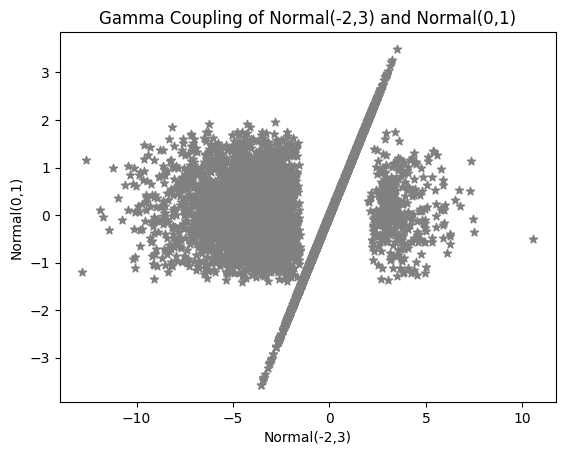

In [22]:
def dp(X):
    return norm.pdf(X, loc = -2, scale = 3)

def dq(X):
    return norm.pdf(X)

def rp():
    return norm.rvs(loc=-2, scale=3, size=1)

def rq():
    return norm.rvs(size=1)


x = 0
y = 0
xs, ys = [], []
for i in range(5000):
    (X,Y) = gamma_coupling(dp,dq,rp,rq)
    xs.append(X)
    ys.append(Y)

fig, ax = plt.subplots()
ax.scatter(xs,ys, color = "grey", marker = "*")
ax.set_xlabel('Normal(-2,3)')
ax.set_ylabel('Normal(0,1)')
ax.set_title('Gamma Coupling of Normal(-2,3) and Normal(0,1)')

Text(0.5, 1.0, 'Reflection Maximal Coupling of Normal(0,1) and Normal(1,1)')

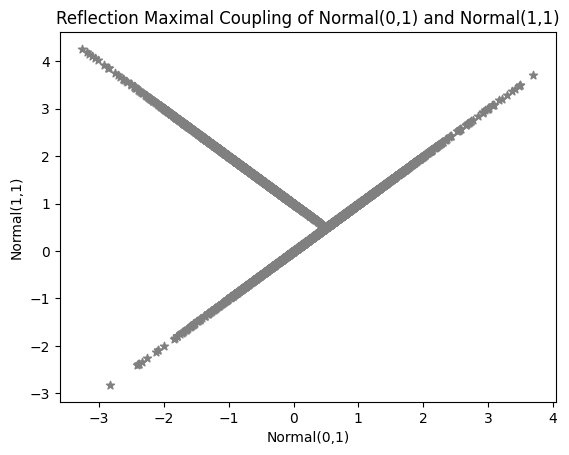

In [4]:
mu1, mu2 = 0,1
scale = 1

xs, ys = [], []
for i in range(5000):
    (X,Y) = reflection_maximal_coupling(mu1,mu2,scale)
    xs.append(X)
    ys.append(Y)

fig, ax = plt.subplots()
ax.scatter(xs,ys, color = "grey", marker = "*")
ax.set_xlabel('Normal(0,1)')
ax.set_ylabel('Normal(1,1)')
ax.set_title('Reflection Maximal Coupling of Normal(0,1) and Normal(1,1)')

(array([   8.,   38.,  180.,  555., 1166., 1413., 1003.,  482.,  136.,
          19.]),
 array([-2.82483293, -2.11638114, -1.40792935, -0.69947755,  0.00897424,
         0.71742603,  1.42587783,  2.13432962,  2.84278142,  3.55123321,
         4.259685  ]),
 <BarContainer object of 10 artists>)

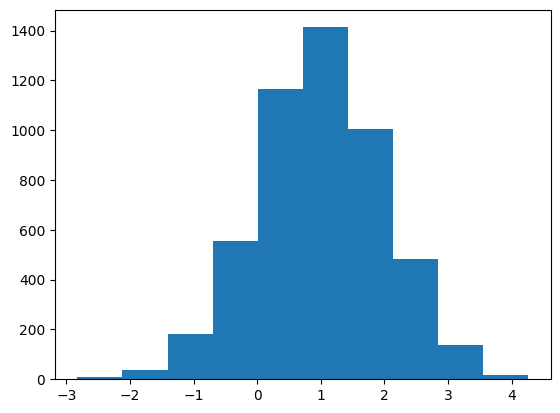

In [6]:
plt.hist(ys)